In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt                                                 # 실제로 그래프를 그려주는 애
import seaborn as sns

import matplotlib.font_manager as fm                                            # 한글폰트 안깨져서 나오게하기위해
font_name = fm.FontProperties(fname="C:\Windows/Fonts/malgun.ttf").get_name()    # 폰트 지정
plt.rc('font', family=font_name)                                                 # matplotlib내에 폰트 설정

mpl.rcParams["axes.unicode_minus"] = False        # 음수 설정, False로 지정하면 음수를 문자로 쓰지않고 숫자로 지정하겠다는 의미, 음수로 사용이 가능해진다.

# mglearn
# pip install mglearn
import mglearn
import sklearn

# train, test 나누기
from sklearn.model_selection import train_test_split

# 적합도 검정
from sklearn import datasets
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Naive Bayes

- 선형모델과 유사(Logistic Regression, LinearSVC, ...)
- 훈련속도는 빠르지만 일반화 성능이 조금 뒤쳐진다.
- 연속적인 데이터 : GaussianNB, 이산적인 데이터  : BernoulliNB, MultinmialNB
- alpha 파라미터를 통해 복잡도 조절

다른 확률이 어떻게 발생했는가

이진분류시에 사용

ex) 스팸메일 구분할때 사용

In [ ]:
# 나이브베이즈.pdf 참고

# p.1
# P : 확률 / A : 사건
# 조건부확률  : 하나의 사건이 일어났을때 다른 사건이 일어날 확률 / 사건들끼리 관계가 있느냐 없느냐

# p.3
# free라는 단어가 들어가있을때 스팸메일일 확률이 클것이다 (이때 p.2에 있는 공식 사용됨)


In [9]:
# 가우시안 나이브 베이즈 (iris 연속적인 데이터)

iris = sklearn.datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.head()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [10]:
from sklearn.naive_bayes import GaussianNB

In [12]:
model = GaussianNB()

# 훈련
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
pred = model.predict(X_test)

In [17]:
print(classification_report(y_test, pred)) # 0 setosa 는 100%, 나머지는 예측정확도값이 좀 떨어짐 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      0.83      0.83         6
           2       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [19]:
# 정확도 
accuracy_score(y_test, pred)

0.9333333333333333

In [21]:
# confusion 
print(confusion_matrix(y_test, pred)) # 0 setosa는 다맞춤, 나머지는 1개씩 틀림

[[ 9  0  0]
 [ 0  5  1]
 [ 0  1 14]]


In [23]:
# 다항분포 나이브베이즈(MultinomialNB) : 영화 리뷰를 이용한 평가 예측(긍정/부정)
# 리뷰의 긍정/부정 여부 평가하기 
# 해당 영화의 긍정/ 부정 여부 알기

# 등장하는 단어 분류해서 count하기 

In [25]:
# 영화 샘플
# movie_review 키에 실제 리뷰 / type에 긍정, 부정 여부 작성

review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [26]:
# type 숫자형으로 바꾸기
df["label"] = df["type"].map({"positive":1, "negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [28]:
# x, y 분류
df_x = df["movie_review"]
df_y = df["label"]

In [37]:
# 문자 추출해내는 패키지
# 각각의 벡터들 카운트해주기
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x_traincv = cv.fit_transform(df_x)
x_traincv  # 10*37 : 10개문장 받아서 단어 다 추출하고 중복된거 뺴서 쭉 연결한게 37개라는거 

encoded_input = x_traincv.toarray()
encoded_input # 해당 단어가 문장당 몇번 등장했는지 알려줌 

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [36]:
# 37개 단어 뭔지 보여줌 / 알파벳순
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [32]:
# 첫번째 문장에 어떤 단어가 나왔는지 알려줌
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [38]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_traincv, df_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
# test용 데이터 

test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

test_df = pd.DataFrame(test_feedback_list)
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})
test_x = test_df["movie_review"]
test_y = test_df["label"]

In [46]:
x_testcv = cv.transform(test_x)
x_testcv

pred = mnb.predict(x_testcv)
pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
accuracy_score(test_y, pred)

1.0

### 베르누이 나이브 베이즈 : 스팸메일 필터

In [3]:
# 훈련
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]


train_df = pd.DataFrame(email_list)
train_df["label"] = train_df["spam"].map({True:1, False:0})
train_df
train_x = train_df["email title"]
train_y = train_df["label"]

train_df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [6]:
# 문자 추출해내는 패키지
# 각각의 벡터들 카운트해주기
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x_traincv = cv.fit_transform(train_x)
x_traincv  # 6*17

encoded_input = x_traincv.toarray()
encoded_input # 해당 단어가 문장당 몇번 등장했는지 알려줌 

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [7]:
# 17개 단어 뭔지 보여줌 / 알파벳순
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [8]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(x_traincv, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [12]:
# test
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

test_df = pd.DataFrame(test_email_list)
test_df["label"] = test_df["spam"].map({True:1, False:0})
test_df
test_x = test_df["email title"]
test_y = test_df["label"]

In [15]:
x_testcv = cv.transform(test_x)
x_testcv

pred = bnb.predict(x_testcv)
pred

array([1, 1, 1, 0, 0, 1], dtype=int64)

In [16]:
accuracy_score(test_y, pred)

0.8333333333333334

## Kmeans
Kmeans.pdf

(p.4 - 10)

K(clusters) = 군집의 개수

중심점(군집의 개수와 동일한 개수로)임의로 놓기

각각의 데이터와 가장 가까운 중심점이 어디인가 알아보기(L2 norm) / 가장 가까운 중심점들을 기준으로 군집을 이루도록 한다

-> First assignment

각 군집들의 중간위치를 찾아 중심점 이동시킨다 

다시 각각의 데이터와 가장 가까운 중심점이 어디인지 알아보기 / 중심점 이동후에 군집 재배치가 이루어질수있다 (4번 데이터 참고)

-> Second iteration

각 군집들의 중간위치를 찾아 중심점 이동시킨다

각각의 데이터와 가장 가까운 중심점이 어디인지 알아보기

데이터의 군집 변화가 없으면 Kmeans clustering is done!!!!!

#### 중심점 배치가 중요요소
- randomly select centroid : 랜덤방식은 위험
- manually assign centroid : 기준이 확실하게 정해져있는 경우 사용하면 좋음 (p.11, 경도와 위도 처럼 확실한거)
- kmean++ : 자체적인 알고리즘

#### k-mean++

 (p.12)

첫번째 데이터를 기준으로 첫번째 중심점을 잡음 

나머지 데이터들의 위치를 비교하여 가장 먼 데이터를 2번재 중심점으로 잡음 

첫번째, 두번째 데이터와 가장 먼 거리에 있는 데이터를 3번재 중심점으로 잡음

겹치는 것을 제외시키기 위해 

## K-means

- 비지도 군집(Clustering) 알고리즘


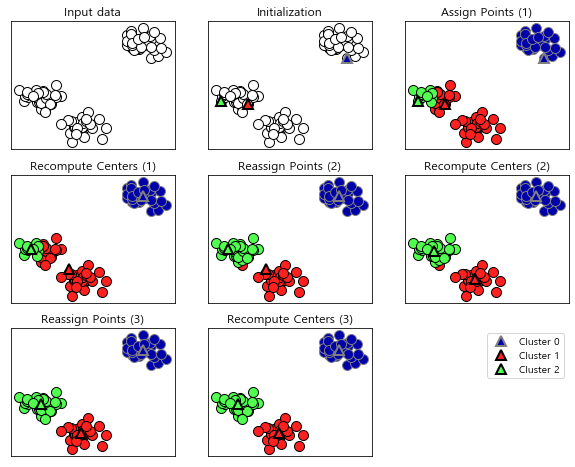

In [2]:
# K-means 설명지도 
mglearn.plots.plot_kmeans_algorithm()

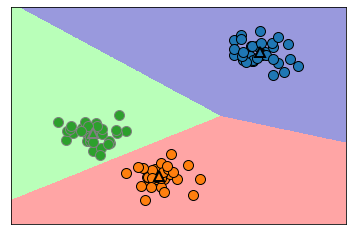

In [3]:
# 군집이 끝난 애들은 이 boundary로 분류된다는 것을 보여주는 map
mglearn.plots.plot_kmeans_boundaries()

In [4]:
# k-means 불러오기
from sklearn.cluster import KMeans

In [6]:
# X, y값 나누기
X, y = datasets.make_blobs()

In [42]:
# 기본값 알아보기 
KMeans().fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

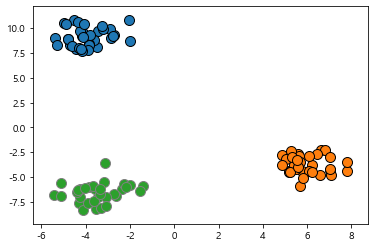

In [10]:
# 분류시키고 그래프로 나타내기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y,  markers="o") # y 데이터의 원래값

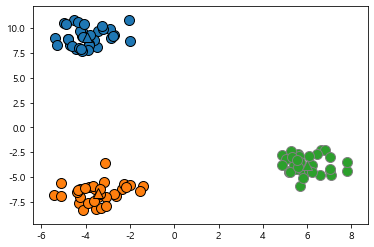

In [41]:
km = KMeans(n_clusters=3).fit(X) # 군집 3개로 나누기 # label모름, 알아서 학습하도록 

# km이 찾은 결과값
# 군집으로 나눈 결과값을 알려줌 
lbl = km.labels_
lbl

# 결과값에 대해 그래프로 나타내기
mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl,  markers="o") # 결과값인 lbl을 넣어주면 y를 넣어준 그래프의 형태와 동일하게 나타남

# 결과값에 대한 중심값들(▲) 그래프 위에 같이 나타내기
mglearn.discrete_scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], [0, 1, 2], markers="^")

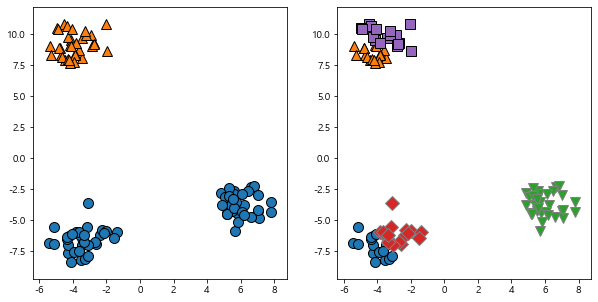

In [24]:
# 그래프 2개로 그려서 확인하기 
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 1행 2열 형태로 그래프 2개 만들기 

# 축 counting
idx = 0

# 훈련시키기
for k in [2, 5]:
    km = KMeans(n_clusters=k).fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, ax=axes[idx])
    idx += 1

### iris 샘플

In [83]:
# 샘플 정리
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns=["target"])
print(X.head())
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   target
0       0
1       0
2       0
3       0
4       0


Text(0.5, 1.0, '꽃잎')

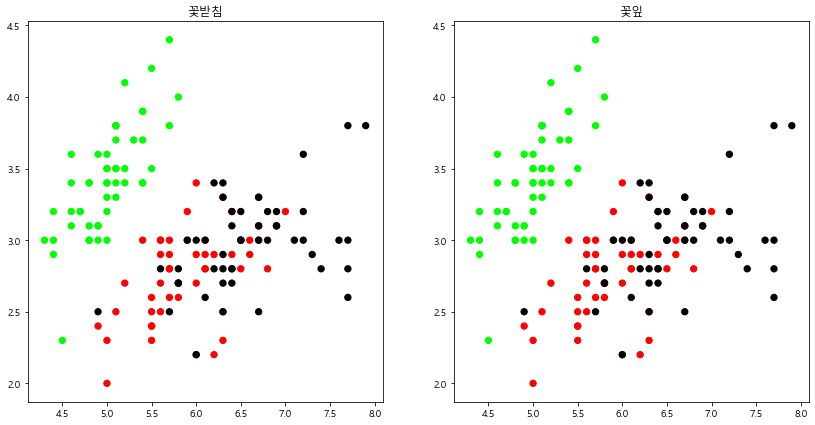

In [84]:
colormap = np.array(["lime","red","black"])
plt.figure(figsize=(14,7))

plt.subplot(1, 2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s= 40)
plt.title("꽃받침")

plt.subplot(1, 2, 2)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s= 40)
plt.title("꽃잎")

In [85]:
model = KMeans(n_clusters=3).fit(X)

In [86]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, '결과')

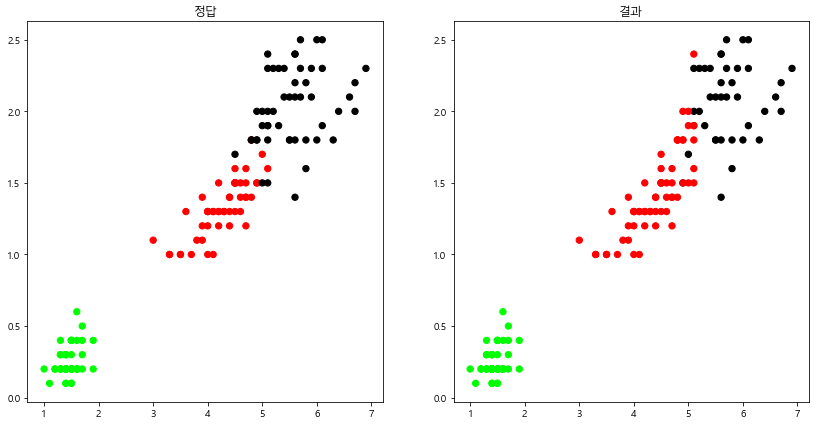

In [88]:
colormap = np.array(["lime","red","black"])
plt.figure(figsize=(14,7))

plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s= 40)
plt.title("정답")

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[model.labels_], s= 40)
plt.title("결과")

In [89]:
accuracy_score(y, model.labels_)

0.8933333333333333

In [90]:
confusion_matrix(y, model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

#### 키, 몸무게 데이터

In [75]:
# Height와 Weight에 따라 분류하기 

df = pd.DataFrame(columns=['height', 'weight'])
df.loc[0] = [185,60]
df.loc[1] = [180,60]
df.loc[2] = [185,70]
df.loc[3] = [165,63]
df.loc[4] = [155,68]
df.loc[5] = [170,75]
df.loc[6] = [175,80]

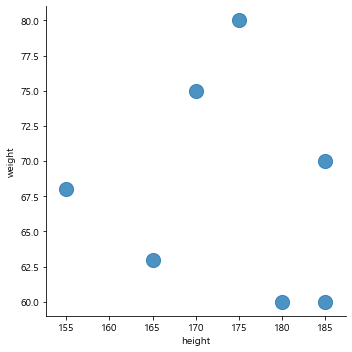

In [76]:
sns.lmplot("height", "weight", data=df, fit_reg=False, scatter_kws={"s":200})

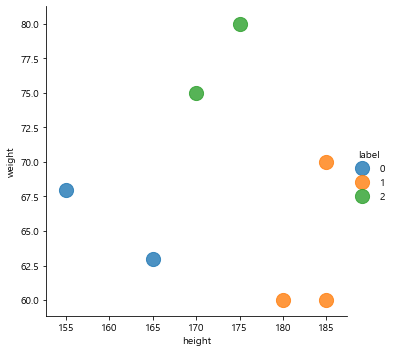

In [108]:
# k-means 키로 3분류 시키기 
model = KMeans(n_clusters=3).fit(df.values)

# label
df["label"] = model.labels_

# 그래프 그리기
sns.lmplot("height", "weight", data=df, fit_reg=False, scatter_kws={"s":200}, hue="label")

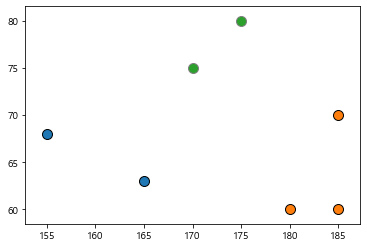

In [109]:
# mglearn.discrete_scatter(df.height, df.weight, df.label, markers="o")

# sns랑 mglearn 뭐가 다를까


In [ ]:
# 데이터 분석
# https://www.kaggle.com/

## 타이타닉을 이용한 머신러닝

### 타이타닉 생존자 예측하기
- http://www.kaggle.com/c/titanic
- Goal : 결과적으로 어떤 승객이 살아남았는지 사망했는지를 판단

### 데이터 준비

In [94]:
# 데이터 준비
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

# 데이터 정보 알아보기
train.head()
test.head()
train.shape
test.shape
train.info() # 결측치 값 알수 있음 
test.info() # 전처리 필요 유무 알수있음 
train.isnull().sum() # 전체 결측치 개수 알아보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 탐색적 데이터 분석

    - Pclass
    - Sex
    - SibSp
    - Parch
    - Embarked
    - Cabin

In [95]:
def bar_chart(feature) :
    survived = train[train["Survived"]==1][feature].value_counts()
    dead =  train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(10, 5))

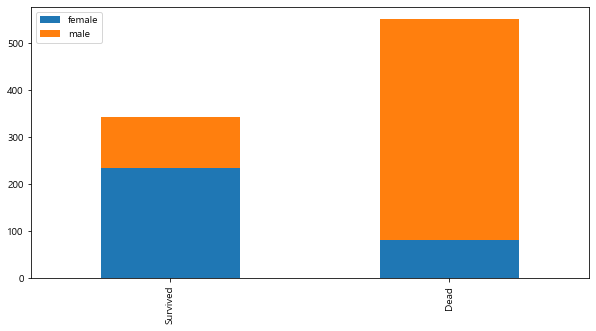

In [96]:
bar_chart("Sex")

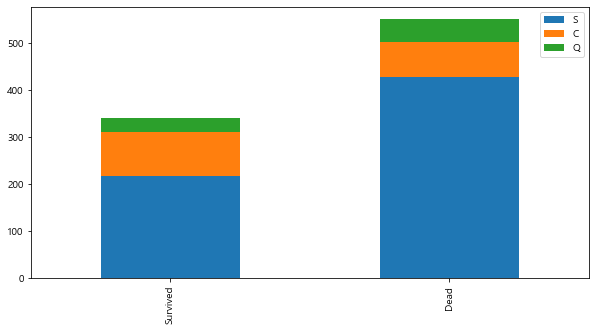

In [97]:
bar_chart("Embarked")

### Feature Engineering

In [98]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
# train, test 묶어주기

train_test_data = [train, test]


### Name 추출 : Mr, Mrs, Miss

for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\.")  
    # 한칸띄고 ' Mr.' 되어있어서, .은 정규표현식에서 의미를 갖고있는 애 이므로 )\.으로 써줘야한다

In [100]:
train["Title"].value_counts()
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [101]:
# Mr, Miss, Mrs 숫자로 지정, 그외의 값들은 다 3

title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col":3, "Major":3, 
                "Mlle":3, "Mme":3, "Lady":3, "Don":3, "Capt":3, "Ms":3, "Countess":3, "Sir":3,
                "Jonkheer":3, "Dona":3} # train용에 없고 test용에만 있는 Dona 같이 해주기

for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [102]:
# 결과 확인

train.head()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [103]:
# 이제 불필요한 column 삭제하기

train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

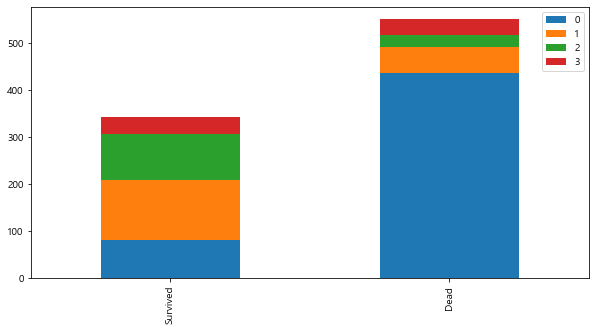

In [104]:
bar_chart("Title") # Mr의 Dead비율이 높음을 볼수있음

In [105]:
# 성별에 대한 숫자화 

for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female":1})

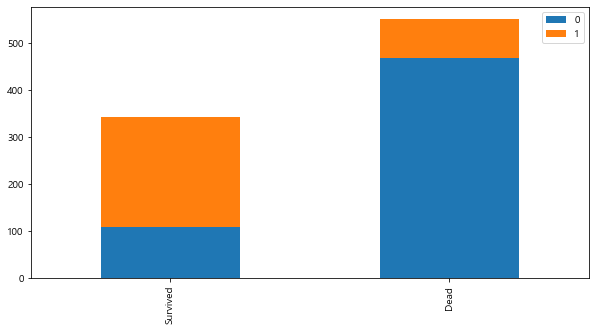

In [106]:
bar_chart("Sex")

In [107]:
### Age에 대한 Binning
# child:0, young:1, adult:2, mid-age:3, senior:4    로 범주화 시키기

# 결측치 처리 : 남자들은 남자들의 평균나이, Mrs는 Mrs의 평균나이, Miss는 Miss의 평균나이 
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [108]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [109]:
# Age 범위로 지정하여 숫자화 시키기

for dataset in train_test_data:
    dataset.loc[dataset["Age"]<16, "Age"] = 0
    dataset.loc[(dataset["Age"]>=16) & (dataset["Age"]<26), "Age"] = 1
    dataset.loc[(dataset["Age"]>=26) & (dataset["Age"]<36), "Age"] = 2
    dataset.loc[(dataset["Age"]>=36) & (dataset["Age"]<62), "Age"] = 3
    dataset.loc[dataset["Age"]>=62, "Age"] = 4

In [110]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


In [111]:
# Embarked
train.isnull().sum() # 여기에만 null값 2개 있음을 알수있다
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

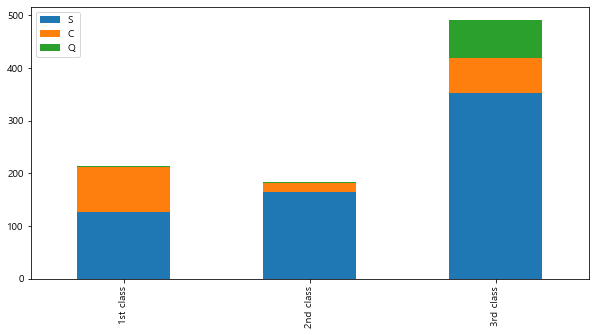

In [112]:
p1 = train[train["Pclass"]==1]["Embarked"].value_counts()
p2 = train[train["Pclass"]==2]["Embarked"].value_counts()
p3 = train[train["Pclass"]==3]["Embarked"].value_counts()

df = pd.DataFrame([p1, p2, p3])
df.index = ["1st class", "2nd class", "3rd class"]
df.head()
df.plot(kind="bar", stacked=True, figsize=(10, 5))

In [113]:
# Embarked 결측치는 S로 채워준다.
train["Embarked"] = train["Embarked"].fillna("S")

In [114]:
train.isnull().sum() # 결측치 없음을 확인하기 

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [115]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0, "C":1, "Q":2})

In [116]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,4.0,0,0,240276,9.6875,NaN,2,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,0,2


In [117]:
# Fare

train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [118]:
# 객실 등급을 이용하여 Fare 결측치 채움
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [119]:
test["Fare"].isnull().sum() # 결측치 처리 확인

0

In [120]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"]<=17, "Fare"] = 0
    dataset.loc[(dataset["Fare"]>17) & (dataset["Fare"]<=30), "Fare"] = 1
    dataset.loc[(dataset["Fare"]>30) & (dataset["Fare"]<=100), "Fare"] = 2
    dataset.loc[(dataset["Fare"]>100), "Fare"] = 3

In [121]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,0,4.0,0,0,240276,0.0,NaN,2,0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,0,2


In [122]:
# Cabin

train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
E101           3
              ..
E38            1
A10            1
A31            1
C7             1
E50            1
Name: Cabin, Length: 147, dtype: int64

In [123]:
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

In [124]:
train.head()
test.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
413,1305,3,0,2.0,0,0,A.5. 3236,0.0,NaN,0,0
414,1306,1,1,3.0,0,0,PC 17758,3.0,C,1,3
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,0,0
416,1308,3,0,2.0,0,0,359309,0.0,NaN,0,0
417,1309,3,0,0.0,1,1,2668,1.0,NaN,1,3


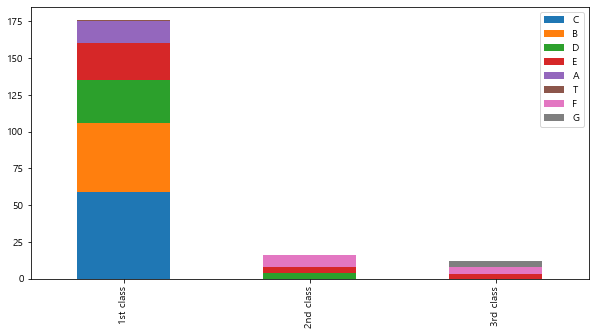

In [125]:
Pclass1 = train[train["Pclass"]==1]["Cabin"].value_counts()
Pclass2 = train[train["Pclass"]==2]["Cabin"].value_counts()
Pclass3 = train[train["Pclass"]==3]["Cabin"].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ["1st class", "2nd class", "3rd class"]
df.plot(kind="bar", stacked=True, figsize=(10, 5))

In [126]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}

for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [127]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [128]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2
2,894,2,0,4.0,0,0,240276,0.0,2.0,2,0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2


In [129]:
# 동승자 컬럼 합치기
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1 # + 1 : 동승자 여부 , 최소값 1 
test["FamilySize"] = test["SibSp"] + train["Parch"] + 1

In [130]:
# 확인
train["FamilySize"].value_counts()
test["FamilySize"].value_counts()

1.0     213
2.0     127
3.0      52
4.0      13
5.0       6
7.0       3
6.0       1
13.0      1
10.0      1
8.0       1
Name: FamilySize, dtype: int64

In [131]:
# 불필요 컬럼 삭제
features_drop = ["Ticket", "SibSp", "Parch"]
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [132]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1.0
1,893,3,1,3.0,0.0,2.0,0,2,2.0
2,894,2,0,4.0,0.0,2.0,2,0,1.0
3,895,3,0,2.0,0.0,2.0,0,0,1.0
4,896,3,1,1.0,0.0,2.0,0,2,2.0


In [133]:
train = train.drop(["PassengerId"], axis=1)

In [134]:
train_data = train.drop("Survived", axis=1)
target = train["Survived"]

In [135]:
print(train_data.shape, target.shape)

(891, 8) (891,)


In [136]:
# 지금까지 한거 저장
# train_data.to_csv("data/titanic/train_data.csv", index=False)
# target.to_csv("data/titanic/target.csv", index=False)

In [12]:
# 파일 불러오기 (데이터 차원 안맞아서 안불러옴.. 걍 위에서부터 실행시키자)
# train_data = pd.read_csv("data/titanic/train_data.csv")
# target = pd.read_csv("data/titanic/target.csv", header=None)

In [137]:
train_data.head()
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Modeling

    - KNN
    - Decision Tree
    - Random Forest
    - SVM
    - Naive Bayes

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [139]:
# Cross Validation(K-fold)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [140]:
# KNN
clf = KNeighborsClassifier(n_neighbors=13)
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy") 
# k_fold라는 방식으로 crossvalidation 진행하겠다 #  n_jobs=1 : 몇번 돌릴건지

print(score) 
# 891개가 10등분으로 나뉘어져, 돌아가면서 test됨 
round(np.mean(score)*100, 2)

[0.8        0.74157303 0.82022472 0.85393258 0.80898876 0.83146067
 0.80898876 0.75280899 0.80898876 0.82022472]


80.47

In [141]:
# Decision Tree
clf = DecisionTreeClassifier()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy") 
print(score)
round(np.mean(score)*100, 2)

[0.78888889 0.88764045 0.76404494 0.78651685 0.87640449 0.80898876
 0.80898876 0.79775281 0.75280899 0.80898876]


80.81

In [142]:
# Random Forest
clf = RandomForestClassifier(n_estimators=13)
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy") 
print(score)
round(np.mean(score)*100, 2)

[0.77777778 0.84269663 0.78651685 0.7752809  0.85393258 0.80898876
 0.80898876 0.7752809  0.74157303 0.79775281]


79.69

In [143]:
# Naive Bayes
clf = GaussianNB()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy") 
print(score)
round(np.mean(score)*100, 2)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


78.78

In [144]:
# SVM
clf = SVC()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy") 
print(score)
round(np.mean(score)*100, 2)

# SVM의 결과값이 가장 좋으므로 SVM으로 TEST 진행한다

[0.81111111 0.78651685 0.83146067 0.82022472 0.84269663 0.82022472
 0.83146067 0.84269663 0.84269663 0.86516854]


C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

82.94

### Testing

In [155]:
clf = SVC().fit(train_data, target)

C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [146]:
# PassengerId 제외시킨 dataframe 새로 만들기 
test_data = test.drop("PassengerId", axis=1).copy() # test 파일은 따로 남겨두고 test_data 파일 따로 만들겠다

# 원본과 확인해보기
test.head()
test_data.head() # 원본에는 PassengerId 남아있음 

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0,1.0
1,3,1,3.0,0.0,2.0,0,2,2.0
2,2,0,4.0,0.0,2.0,2,0,1.0
3,3,0,2.0,0.0,2.0,0,0,1.0
4,3,1,1.0,0.0,2.0,0,2,2.0


In [152]:
# 예측
pred = clf.predict(test_data)

In [153]:
# 생존자 예측한 dataframe 변수로 저장
submission = pd.DataFrame({"PassengerId":test["PassengerId"], "Surviver":pred})
submission.head()

,PassengerId,Surviver
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [154]:
# 파일로 저장
submission.to_csv("data/titanic/submission.csv", index=False)

# 인공신경망
인공신경망.pdf 참고

Tensorflow

- 다층 퍼셉트론(Multilayer Perceptron, MLP) : 은닉층에서 가중치가 다양하게 학습됨
- 비교적 간단한 분류와 회귀에서 사용
- 피드 포워드 신경망, 신경망, 완전 연결 신경망(Full Connected Neural Network)

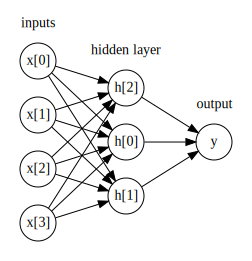

In [158]:
# graphviz   일시적으로 path 걸어주기 
# 운영체재와 관련된 여러가지 패키지 
import os 

os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
# 환경변수environ에서 path를 불러오겠다 
# += 로 누적시켜줘야함, =하면 기존에 있던거 다 날아감 주의!!!!
# pathsep : 새로운 설정을 연결하기위한 중간 연결고리 

# 머신러닝 구조 예시
mglearn.plots.plot_logistic_regression_graph() 

# 인공신경망 구조(머신러닝에 하나 더 추가된 형태)
mglearn.plots.plot_single_hidden_layer_graph()
mglearn.plots.plot_two_hidden_layer_graph()